In [1]:
%matplotlib inline 
import matplotlib.pylab
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [3]:
    df = pd.DataFrame(np.random.randn(600, 3),index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])
df.head()

,A,B,C
2016-07-01 00:00:00,-0.489075,1.679978,-2.108028
2016-07-01 00:00:01,1.427475,-0.051986,0.410222
2016-07-01 00:00:02,-1.430082,0.539277,-0.742993
2016-07-01 00:00:03,-0.552155,0.739226,1.002004
2016-07-01 00:00:04,0.287248,0.242446,0.696559


In [4]:
df.index

DatetimeIndex(['2016-07-01 00:00:00', '2016-07-01 00:00:01',
               '2016-07-01 00:00:02', '2016-07-01 00:00:03',
               '2016-07-01 00:00:04', '2016-07-01 00:00:05',
               '2016-07-01 00:00:06', '2016-07-01 00:00:07',
               '2016-07-01 00:00:08', '2016-07-01 00:00:09',
               ...
               '2016-07-01 00:09:50', '2016-07-01 00:09:51',
               '2016-07-01 00:09:52', '2016-07-01 00:09:53',
               '2016-07-01 00:09:54', '2016-07-01 00:09:55',
               '2016-07-01 00:09:56', '2016-07-01 00:09:57',
               '2016-07-01 00:09:58', '2016-07-01 00:09:59'],
              dtype='datetime64[ns]', length=600, freq='S')

In [5]:
ts = pd.Series(np.random.randn(20),pd.date_range('7/1/16',freq = 'H',periods = 20))
# ts_lagged = ts.shift(-5)
ts_lagged = ts.shift(5)
ts
#tshift shifts indices

2016-07-01 00:00:00    1.079695
2016-07-01 01:00:00   -0.919640
2016-07-01 02:00:00    0.642486
2016-07-01 03:00:00    0.562936
2016-07-01 04:00:00    1.622345
2016-07-01 05:00:00    0.075217
2016-07-01 06:00:00   -1.360653
2016-07-01 07:00:00   -0.963343
2016-07-01 08:00:00    0.033918
2016-07-01 09:00:00   -0.286537
2016-07-01 10:00:00    0.506492
2016-07-01 11:00:00   -1.538559
2016-07-01 12:00:00    0.264764
2016-07-01 13:00:00   -1.517441
2016-07-01 14:00:00    0.780260
2016-07-01 15:00:00    0.980309
2016-07-01 16:00:00   -0.866945
2016-07-01 17:00:00    0.373069
2016-07-01 18:00:00    1.457777
2016-07-01 19:00:00    0.939691
Freq: H, dtype: float64

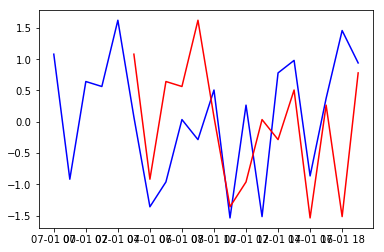

In [6]:
# 5 hour lag
plt.plot(ts,color = 'blue')
plt.plot(ts_lagged,color = 'red')

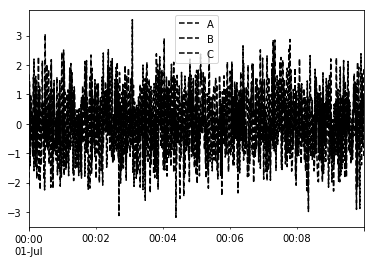

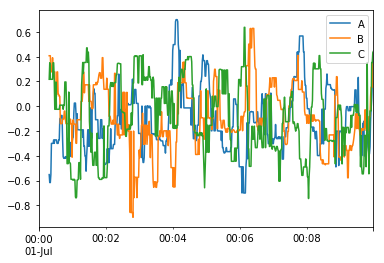

In [7]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 20)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
# r.mean().plot(style = 'k')
# trying more than one function with r
r.agg(['sum','var'])
# trying function
r.quantile(.5).plot()


In [8]:
#custom function
df.rolling(window =10,center = False).apply(lambda x:x[1]/x[2])[10:20]
df.rolling(window =10,center = False).apply(lambda x:x[0]-x[-1])[10:20]

,A,B,C
2016-07-01 00:00:10,2.043923,-0.746820,-0.284165
2016-07-01 00:00:11,-2.153488,1.064863,-0.261585
2016-07-01 00:00:12,0.890170,-0.872947,-0.165248
2016-07-01 00:00:13,-1.151431,1.195951,0.173327
2016-07-01 00:00:14,-1.066784,1.194652,1.321347
2016-07-01 00:00:15,-1.320618,-0.077563,-0.860434
2016-07-01 00:00:16,-0.128629,0.506480,-0.906561
2016-07-01 00:00:17,1.481735,1.298980,-0.998143
2016-07-01 00:00:18,0.338104,-0.333018,2.373272
2016-07-01 00:00:19,-1.790808,0.231317,-0.572718


In [9]:
# rolling window function of monthly data from daily data
import matplotlib.pyplot as plt
ts_long= pd.Series(np.random.randn(200),pd.date_range('7/1/2016',freq = 'D', periods =200))
ts_long.resample('M').mean().rolling(window = 3).mean().plot
plt.show()


In [10]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C
2016-07-01 00:00:01,0.469200,0.813996,-0.848903
2016-07-01 00:00:02,-0.163894,0.722423,-0.813600
2016-07-01 00:00:03,-0.260959,0.726624,-0.359699
2016-07-01 00:00:04,-0.151318,0.629788,-0.148447


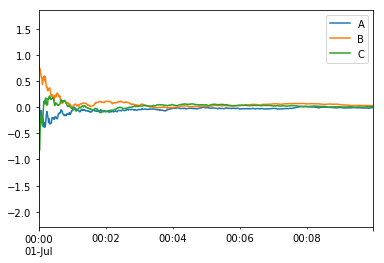

In [11]:
df.expanding(min_periods = 1).mean().plot()

In [12]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

C:\Users\anands\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(span=15,min_periods=2,adjust=True,ignore_na=False).mean()
  from ipykernel import kernelapp as app


,A,B,C
2016-07-01 00:00:01,0.533085,0.756264,-0.764962
2016-07-01 00:00:02,-0.210363,0.674091,-0.756642
2016-07-01 00:00:03,-0.313606,0.693766,-0.225417
2016-07-01 00:00:04,-0.159412,0.577946,0.011186
2016-07-01 00:00:05,-0.034244,0.511929,-0.115135
2016-07-01 00:00:06,-0.154259,0.490311,-0.223927
2016-07-01 00:00:07,-0.343054,0.332026,-0.361161
2016-07-01 00:00:08,-0.253719,0.554271,-0.068476
2016-07-01 00:00:09,-0.482084,0.597883,0.316434


In [13]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [14]:
df.head()

,A,B,C,D
2016-06-06,0.772806,-0.222821,-0.600826,-0.437907
2016-06-07,-1.914825,1.104556,-0.208603,0.549192
2016-06-08,-0.228079,0.787936,0.252657,-0.977050
2016-06-09,-0.872815,0.553482,0.680523,1.090065
2016-06-10,-0.551899,0.068286,0.175423,0.644463


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009FE8DA0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000A4D9048>], dtype=object)

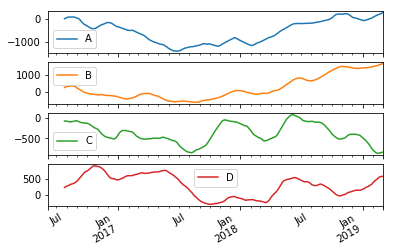

In [15]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [16]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())[10:20]

,A,B,C,D
2016-06-16,0.732188,0.810250,0.472638,1.079428
2016-06-17,0.677267,0.870717,0.542291,1.141110
2016-06-18,0.655935,0.797472,0.731623,1.008321
2016-06-19,0.652291,0.654449,0.869254,1.062076
2016-06-20,0.707869,0.511861,0.891189,1.138481
2016-06-21,0.802021,0.410579,0.903585,1.160417
2016-06-22,0.694132,0.292713,0.809567,1.232916
2016-06-23,0.588164,0.300549,0.768489,1.121224
2016-06-24,0.563838,0.279563,0.709969,0.987467
2016-06-25,0.578354,0.444940,0.661362,0.840226


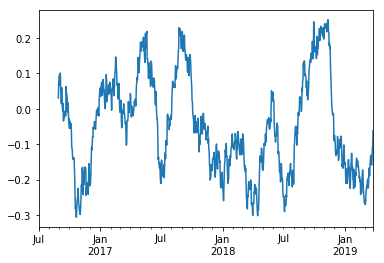

In [17]:
# EWMA
ts = pd.Series(np.random.randn(1000),pd.date_range('7/1/2016',freq = 'D', periods =1000))
ts.ewm(span=60,freq = 'D',min_periods = 0,adjust = True).mean().plot
ts.rolling(window = 60).mean().plot()
# Why use EWMA?

When would you use expanding window vs rolling window?
* Answer: When we are adding more data(new ones) and we want to retain existing data as well , we would use expanding window.


In [18]:
# Go do it!
# pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate

In [19]:
# Come up with a series that shows how EWMA and Rolling can importantly differ even with the same window setting

In [20]:
r = df.rolling(window = 20)
r.apply(lambda x:sorted(x)[round(len(x)*.5)])[20:30]

,A,B,C,D
2016-06-26,-1.741755,0.923451,-1.505958,3.898801
2016-06-27,-1.741755,1.012599,-1.561727,4.160145
2016-06-28,-1.741755,1.012599,-1.644728,4.872923
2016-06-29,-1.636747,1.012599,-1.696114,5.313244
2016-06-30,-1.575062,1.012599,-1.809288,5.432547
2016-07-01,-1.510275,1.012599,-1.810624,5.748997
2016-07-02,-1.174075,1.031298,-2.755732,5.824675
2016-07-03,-1.051536,1.294092,-2.863773,5.944698
2016-07-04,-0.896553,2.696214,-2.922858,6.815976
2016-07-05,-0.875330,4.528891,-2.922858,6.815976


In [21]:
r = df.rolling(window = 20)
r.agg(['sum','count']).head()
# r.apply(lambda x:sorted(x)[round(len(x)*.5)])[20:30]

A         B         C         D      
           sum count sum count sum count sum count
2016-06-06 NaN   1.0 NaN   1.0 NaN   1.0 NaN   1.0
2016-06-07 NaN   2.0 NaN   2.0 NaN   2.0 NaN   2.0
2016-06-08 NaN   3.0 NaN   3.0 NaN   3.0 NaN   3.0
2016-06-09 NaN   4.0 NaN   4.0 NaN   4.0 NaN   4.0
2016-06-10 NaN   5.0 NaN   5.0 NaN   5.0 NaN   5.0